In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
# for colab user
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#TODO(使用google colab)
#建議:可以將資料轉成np.array後進行處理
data = pd.read_csv('/content/drive/MyDrive/colabspe/dataset.CSV')

# Preprocess
練習標準化、正規化和微分前處理

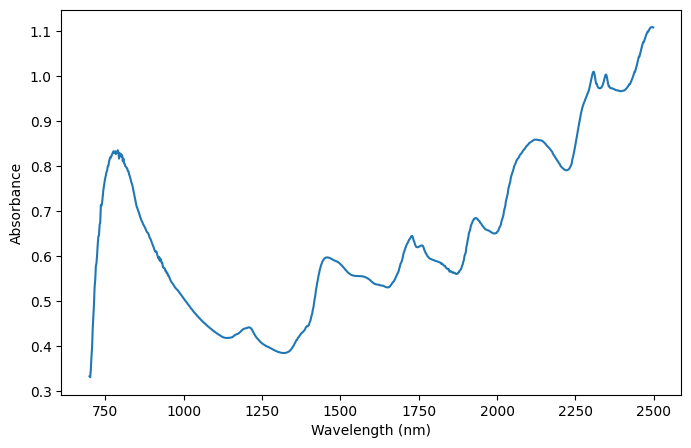

In [4]:
absorbance = data.iloc[0, 1:].values

#可以透過此code查看處理後的光譜
wavelength=np.arange(700,2500,2)

plt.figure(figsize=(8,5))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.plot(wavelength,absorbance)

In [21]:
# TODO
# 標準化吸收度數據
from sklearn.preprocessing import StandardScaler
# 標準化
absorbance_min = absorbance.min()
absorbance_max = absorbance.max()
absorbance_norm = (absorbance - absorbance_min) / (absorbance_max - absorbance_min)

In [22]:
# TODO
# 正規化吸收度數據
# 正規化
absorbance_mean = absorbance.mean()
absorbance_std = absorbance.std()
absorbance_stdized = (absorbance - absorbance_mean) / (absorbance_std)

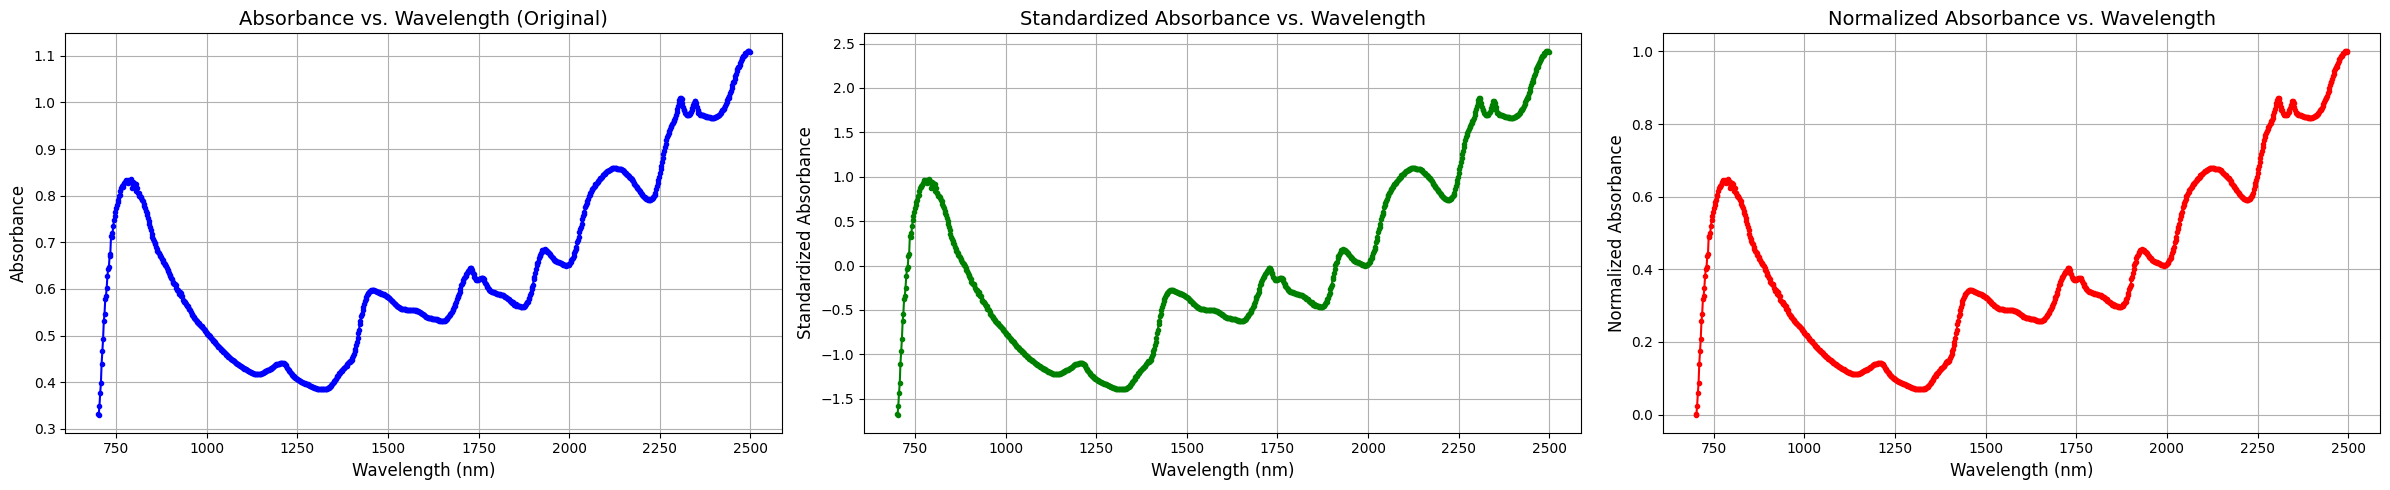

In [23]:
plt.figure(figsize=(24, 5))

# Original
plt.subplot(1, 3, 1)
plt.plot(wavelength, absorbance, marker='.', linestyle='-', color='b')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.title('Absorbance vs. Wavelength (Original)', fontsize=14)
plt.grid(True)

# Standardized
plt.subplot(1, 3, 2)
plt.plot(wavelength, absorbance_stdized, marker='.', linestyle='-', color='g')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Standardized Absorbance', fontsize=12)
plt.title('Standardized Absorbance vs. Wavelength', fontsize=14)
plt.grid(True)


# Normalized
plt.subplot(1, 3, 3)
plt.plot(wavelength, absorbance_norm, marker='.', linestyle='-', color='r')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Normalized Absorbance', fontsize=12)
plt.title('Normalized Absorbance vs. Wavelength', fontsize=14)
plt.grid(True)


plt.tight_layout()
plt.show()

In [24]:
# TODO
# 計算一次微分

first_derivative = np.gradient(absorbance,wavelength)

# TODO
# 計算二次微分

second_derivative = np.gradient(first_derivative,wavelength)

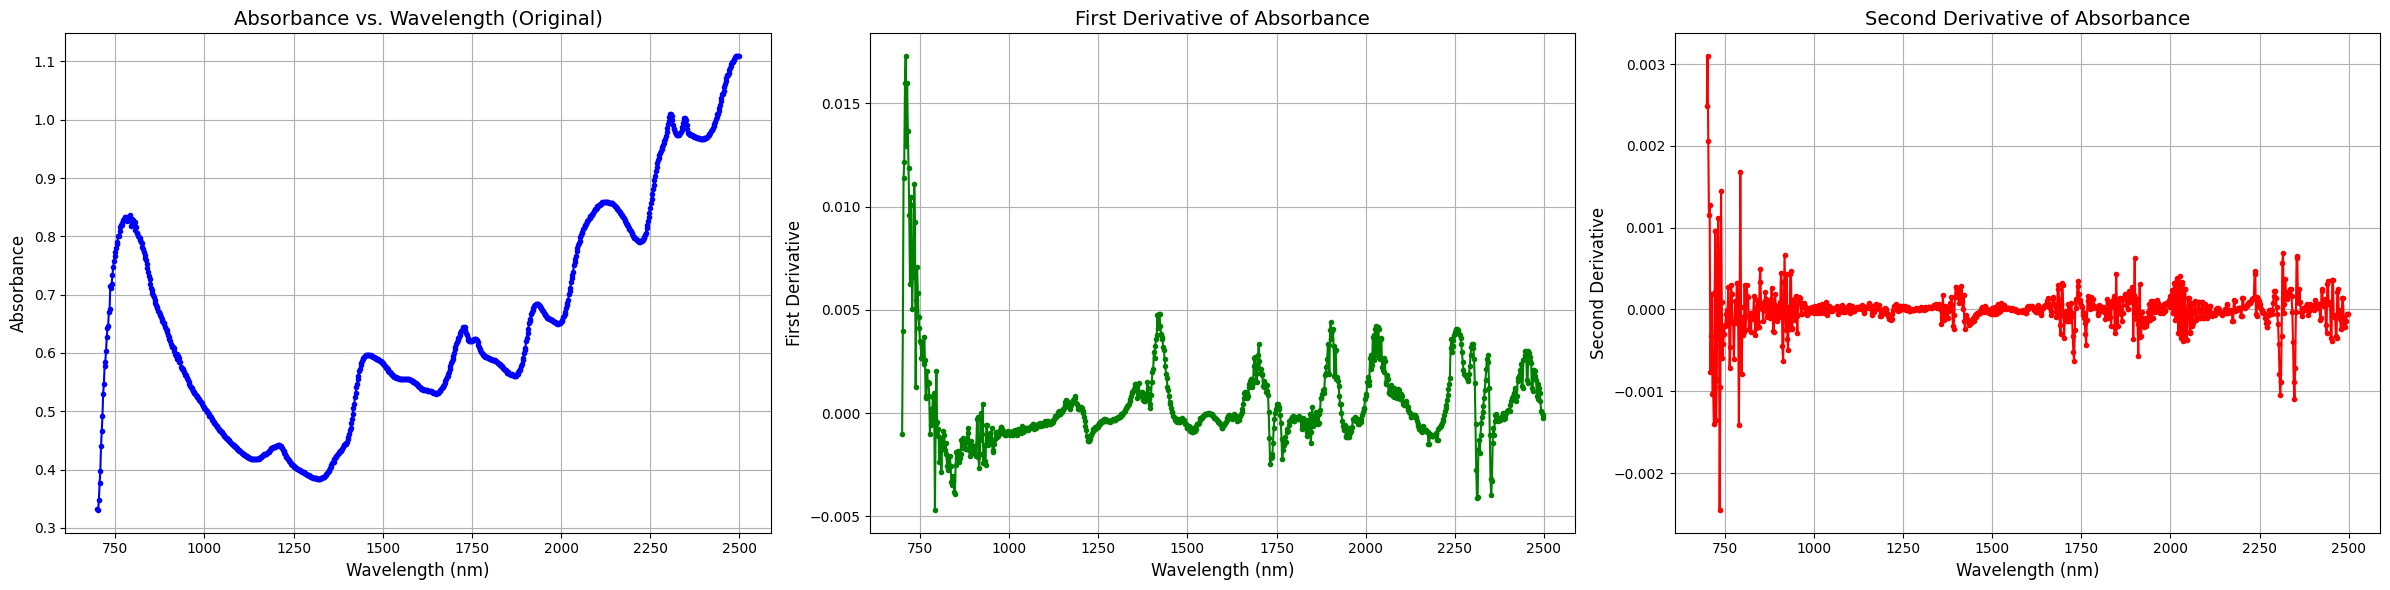

In [25]:
# 繪製原始數據、一次微分和二次微分的結果
plt.figure(figsize=(24, 6))

# 原始數據
plt.subplot(1, 3, 1)
plt.plot(wavelength, absorbance, marker='.', linestyle='-', color='b')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.title('Absorbance vs. Wavelength (Original)', fontsize=14)
plt.grid(True)

# 一次微分
plt.subplot(1, 3, 2)
plt.plot(wavelength, first_derivative, marker='.', linestyle='-', color='g')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('First Derivative', fontsize=12)
plt.title('First Derivative of Absorbance', fontsize=14)
plt.grid(True)

# 二次微分
plt.subplot(1, 3, 3)
plt.plot(wavelength, second_derivative, marker='.', linestyle='-', color='r')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Second Derivative', fontsize=12)
plt.title('Second Derivative of Absorbance', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

# Machine Learning

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 假設你的數據在 data 中，並且第一列是標籤，其他列是特徵
# 示例：data = pd.read_csv('your_data.csv')

# 將數據分為特徵 (X) 和標籤 (y)
X = data.iloc[:, 1:].values  # 光譜數據
y = data.iloc[:, 0].values   # 標籤 (國家)

# 使用 train_test_split 將數據分為訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 檢查分割後的數據形狀
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

x_train shape: (704, 900), x_test shape: (177, 900)
y_train shape: (704,), y_test shape: (177,)


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

# MSC 處理函數
def msc(sdata):
    x, y = sdata.shape
    n = x
    k = np.zeros(x)
    b = np.zeros(x)
    M = np.mean(sdata, axis=0)

    for i in range(n):
        y = sdata[i, :]
        y = y.reshape(-1, 1)
        M = M.reshape(-1, 1)
        model = LinearRegression()
        model.fit(M, y)
        k[i] = model.coef_
        b[i] = model.intercept_

    spec_msc = np.zeros_like(sdata)
    for i in range(n):
        bb = np.repeat(b[i], sdata.shape[1])
        kk = np.repeat(k[i], sdata.shape[1])
        temp = (sdata[i, :] - bb) / kk
        spec_msc[i, :] = temp
    return spec_msc

# 對訓練集和測試集進行 MSC 處理
x_train_msc = msc(x_train)
x_test_msc = msc(x_test)

# 檢查處理後的數據形狀
print(f"x_train_msc shape: {x_train_msc.shape}, x_test_msc shape: {x_test_msc.shape}")

<ipython-input-11-db970616918c>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k[i] = model.coef_
<ipython-input-11-db970616918c>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[i] = model.intercept_
<ipython-input-11-db970616918c>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k[i] = model.coef_
<ipython-input-11-db970616918c>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

x_train_msc shape: (704, 900), x_test_msc shape: (177, 900)


<ipython-input-11-db970616918c>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[i] = model.intercept_
<ipython-input-11-db970616918c>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k[i] = model.coef_
<ipython-input-11-db970616918c>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[i] = model.intercept_
<ipython-input-11-db970616918c>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

In [12]:
from scipy.signal import savgol_filter

# 使用 Savitzky-Golay 濾波器進行一階微分處理
x_train_sg = savgol_filter(x_train_msc, window_length=19, polyorder=2, deriv=1)
x_test_sg = savgol_filter(x_test_msc, window_length=19, polyorder=2, deriv=1)

# 檢查處理後的數據形狀
print(f"x_train_sg shape: {x_train_sg.shape}, x_test_sg shape: {x_test_sg.shape}")

x_train_sg shape: (704, 900), x_test_sg shape: (177, 900)


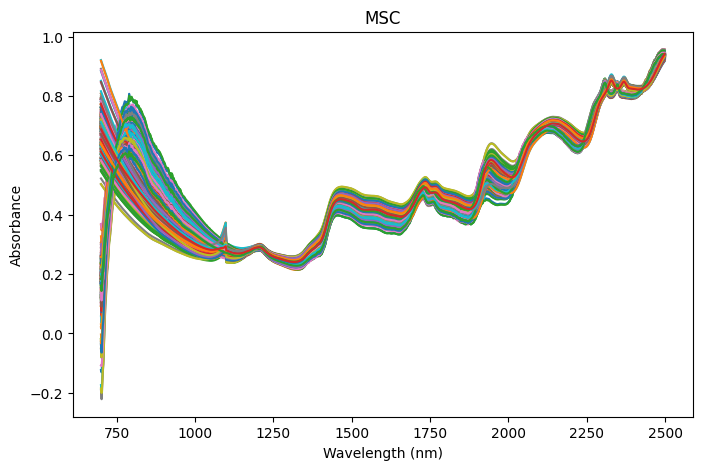

In [13]:
#可以透過此code查看處理後的光譜
wavelength = np.arange(700,2500,2)

plt.figure(figsize=(8,5))
plt.title('MSC')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.plot(wavelength, x_train_msc.T)

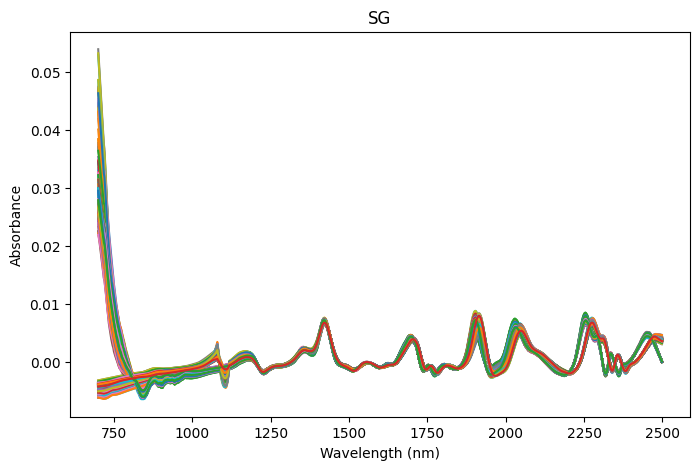

In [14]:
#可以透過此code查看處理後的光譜
wavelength = np.arange(700,2500,2)

plt.figure(figsize=(8,5))
plt.title('SG')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.plot(wavelength, x_train_sg.T)

In [15]:
#TODO(調整模型參數)。n_neighbors, weights, algorithm......
knn = KNeighborsClassifier(n_neighbors=3,weights = 'distance',algorithm='auto',leaf_size =100,p=2)
knn.fit(x_train_msc, y_train)
y_pred = knn.predict(x_test_msc)
print('\n',classification_report(y_test, y_pred))


               precision    recall  f1-score   support

      Brazil       0.79      0.72      0.75        46
  Costa Rica       0.74      0.68      0.70        74
       Kenya       0.57      0.68      0.62        41
       Yemen       0.56      0.62      0.59        16

    accuracy                           0.68       177
   macro avg       0.66      0.68      0.67       177
weighted avg       0.69      0.68      0.69       177



In [16]:
#TODO(調整模型參數)。kernel, C......
svm_classifier = SVC(kernel = 'linear',C=10,gamma='auto',class_weight = None)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
print('\n',classification_report(y_test, y_pred))


               precision    recall  f1-score   support

      Brazil       0.58      0.80      0.67        46
  Costa Rica       0.58      0.70      0.64        74
       Kenya       0.56      0.22      0.32        41
       Yemen       0.50      0.25      0.33        16

    accuracy                           0.58       177
   macro avg       0.56      0.49      0.49       177
weighted avg       0.57      0.58      0.54       177



In [17]:

# 訓練和預測
rf = RandomForestClassifier(n_estimators=60)
rf.fit(x_train_sg, y_train)
y_pred = rf.predict(x_test_sg)

# 輸出結果
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

      Brazil       0.84      0.89      0.86        46
  Costa Rica       0.78      0.82      0.80        74
       Kenya       0.71      0.66      0.68        41
       Yemen       0.83      0.62      0.71        16

    accuracy                           0.79       177
   macro avg       0.79      0.75      0.77       177
weighted avg       0.78      0.79      0.78       177



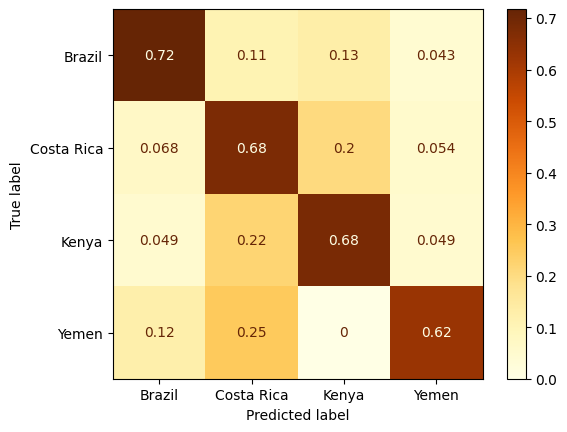

In [18]:
#將最好的模型及前處理方式放入
disp = ConfusionMatrixDisplay.from_estimator(knn, x_test_msc, y_test, normalize= 'true', cmap='YlOrBr', display_labels=knn.classes_)

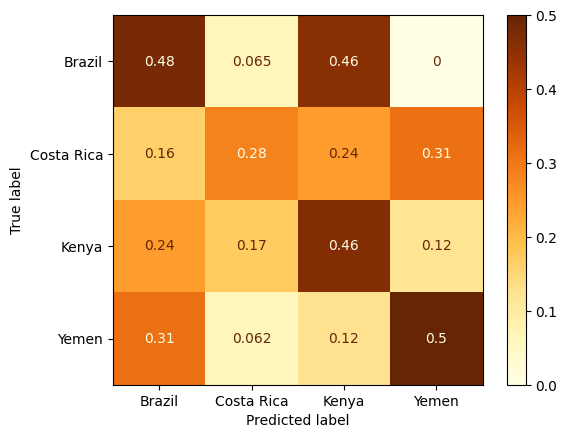

In [19]:
#將最好的模型及前處理方式放入
disp = ConfusionMatrixDisplay.from_estimator(svm_classifier, x_test_msc, y_test, normalize= 'true', cmap='YlOrBr', display_labels=svm_classifier.classes_)

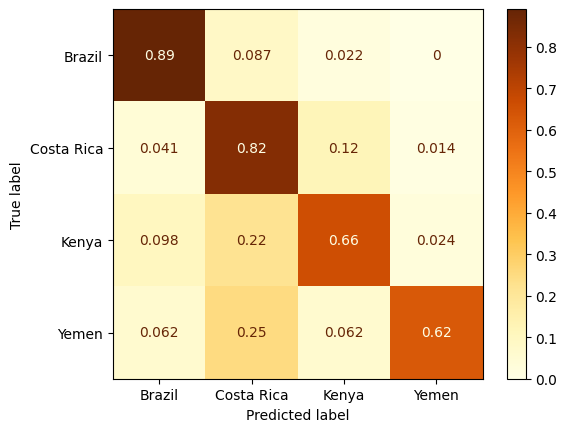

In [20]:
#將最好的模型及前處理方式放入
disp = ConfusionMatrixDisplay.from_estimator(rf, x_test_sg, y_test, normalize= 'true', cmap='YlOrBr', display_labels=rf.classes_)